In [ ]:
%run scripts/train.py \
--decoder_h_dim_g 16 \
--print_every 100 \
--l2_loss_weight 0 \
--use_gpu 1 \
--num_samples_check 5000 \
--loader_num_workers 4 \
--d_learning_rate 0.00001 \
--embedding_dim 16 \
--dropout 0.0 \
--dataset_name eth \
--pooling_type none \
--clipping_threshold_g 2 \
--num_layers 1 \
--clipping_threshold_d 0 \
--best_k 1 \
--g_steps 1 \
--checkpoint_name checkpoint \
--noise_mix_type global \
--encoder_h_dim_d 32 \
--pred_len 8 \
--delim tab \
--noise_type gaussian \
--d_type global \
--restore_from_checkpoint 1 \
--batch_norm 0 \
--batch_size 64 \
--timing 0 \
--noise_dim 4 \
--encoder_h_dim_g 16 \
--grid_size 8 \
--skip 1 \
--num_epochs 100 \
--pool_every_timestep 0 \
--gpu_num 0 \
--bottleneck_dim 8 \
--mlp_dim 32 \
--d_steps 1 \
--checkpoint_every 10 \
--neighborhood_size 2.0 \
--obs_len 8 \
--g_learning_rate 0.00001\

In [ ]:
%run scripts/train.py \
--decoder_h_dim_g 64 \
--print_every 100 \
--l2_loss_weight 0.0 \
--use_gpu 1 \
--num_samples_check 5000 \
--loader_num_workers 4 \
--d_learning_rate 0.001 \
--embedding_dim 16 \
--dropout 0.0 \
--dataset_name eth \
--pooling_type pool_net \
--clipping_threshold_g 2 \
--num_layers 1 \
--clipping_threshold_d 0 \
--best_k 20 \
--g_steps 1 \
--checkpoint_name checkpoint \
--noise_mix_type global \
--encoder_h_dim_d 48 \
--pred_len 8 \
--delim tab \
--noise_type gaussian \
--d_type global \
--restore_from_checkpoint 1 \
--batch_norm 0 \
--batch_size 64 \
--timing 0 \
--noise_dim 8 \
--encoder_h_dim_g 32 \
--grid_size 8 \
--skip 1 \
--num_epochs 50 \
--pool_every_timestep 0 \
--gpu_num 0 \
--bottleneck_dim 8 \
--mlp_dim 64 \ #64
--d_steps 1 \
--checkpoint_every 10 \
--neighborhood_size 2.0 \
--obs_len 8 \
--g_learning_rate 0.0001\

In [ ]:
from plot_metrics import plot_train_val_ade
checkpoint = torch.load('checkpoint_with_model.pt')
plot_train_val_ade(checkpoint)

In [ ]:
# ! python plot.py --model_path models/sgan-models/01
# %run scripts/evaluate_model.py --model_path models/sgan-models
# %run scripts/evaluate_model.py --model_path models/sgan-p-models

In [2]:
%run scripts/evaluate_model.py --model_path checkpoint_with_model.pt

Dataset: zara2, Pred Len: 12, ADE: 0.36, FDE: 0.72


In [3]:
%run scripts/evaluate_model.py --model_path 'models/sgan-p-models/hotel_8_model.pt'

Dataset: hotel, Pred Len: 8, ADE: 0.38, FDE: 0.73


In [11]:
%run scripts/evaluate_model.py --model_path 'ORIGINAL/checkpoint_with_model.pt'

Dataset: eth, Pred Len: 12, ADE: 0.73, FDE: 1.28


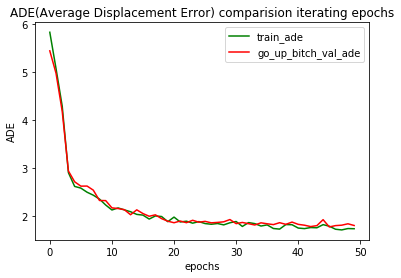

In [2]:
import numpy as np
import torch
import matplotlib.pyplot as plt
torch.manual_seed(1)
%matplotlib inline
path = 'checkpoint_with_model.pt'
checkpoint = torch.load(path)
def plot_train_val(checkpoint):
    
    train_ade = checkpoint['metrics_train_epoch']['fde']
    val_ade = checkpoint['metrics_val_epoch']['fde']
    x_axix = [i for i in range(len(train_ade))]
    sub_axix = x_axix
    plt.title('ADE(Average Displacement Error) comparision iterating epochs')
    plt.plot(x_axix, train_ade, color='green', label='train_ade')
    plt.plot(sub_axix, val_ade, color='red', label='go_up_bitch_val_ade')
    plt.legend() 
    plt.xlabel('epochs')
    plt.ylabel('ADE')
    plt.show()
    
plot_train_val(checkpoint)

In [3]:
checkpoint['args']['num_epochs']=80

In [ ]:
checkpoint['counters']['epoch'] = 80

In [ ]:
checkpoint['args']['num_iterations']

In [4]:
torch.save(checkpoint,'checkpoint_with_model.pt')